In [1]:
from scipy.io import loadmat

folder = "/Volumes/LACIE SHARE/seizure-prediction"

mat_data = loadmat(folder + "/Dog_1/Dog_1/Dog_1_interictal_segment_0001.mat")
print(mat_data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 21 01:00:00 2014', '__version__': '1.0', '__globals__': [], 'interictal_segment_1': array([[(array([[  0,  13,  15, ..., -25, -21, -12],
               [-26,  -4,  11, ..., -39, -32, -21],
               [-42, -35, -19, ..., -16, -16, -18],
               ...,
               [ 45,  30,  25, ...,  43,  28,  17],
               [ 15,   8,  -6, ...,  14,  13,   6],
               [-18, -20, -19, ...,   9,   9,   3]], dtype=int16), array([[600]], dtype=uint16), array([[399.6097561]]), array([[array(['NVC1202_32_002_Ecog_c001'], dtype='<U24'),
                array(['NVC1202_32_002_Ecog_c002'], dtype='<U24'),
                array(['NVC1202_32_002_Ecog_c003'], dtype='<U24'),
                array(['NVC1202_32_002_Ecog_c004'], dtype='<U24'),
                array(['NVC1202_32_002_Ecog_c005'], dtype='<U24'),
                array(['NVC1202_32_002_Ecog_c006'], dtype='<U24'),
                array(['NVC1202_32_002_Ecog_

In [2]:
import numpy as np
signals = np.array(mat_data['interictal_segment_1'][0, 0][0])
print(signals)

[[  0  13  15 ... -25 -21 -12]
 [-26  -4  11 ... -39 -32 -21]
 [-42 -35 -19 ... -16 -16 -18]
 ...
 [ 45  30  25 ...  43  28  17]
 [ 15   8  -6 ...  14  13   6]
 [-18 -20 -19 ...   9   9   3]]


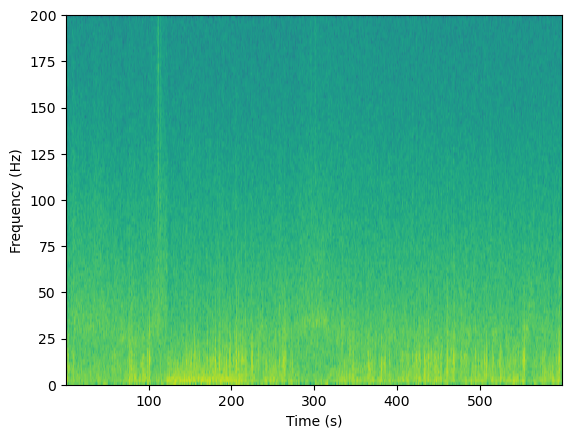

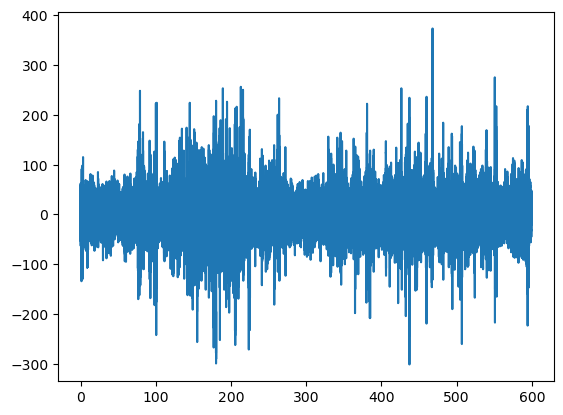

/Users/aidenmaloney-bertelli/anaconda3/envs/eeg/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/aidenmaloney-bertelli/anaconda3/envs/eeg/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


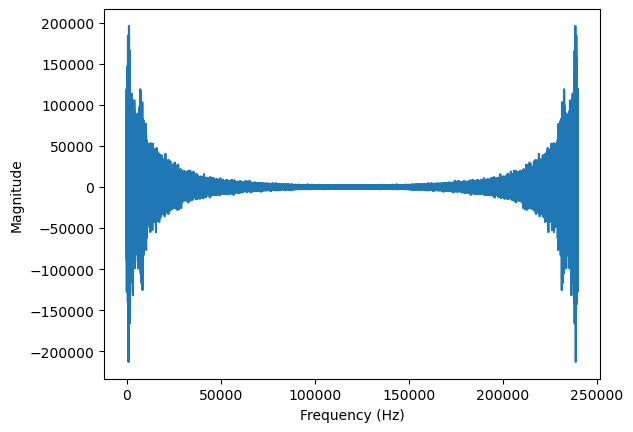

In [23]:
import matplotlib.pyplot as plt
import numpy as np

Pxx, freqs, bins, im = plt.specgram(signals[0, :], Fs=400)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

t_axis = np.arange(0, signals.shape[1])*(1/400)
plt.plot(t_axis, signals[0, :])
plt.show()

fft_0 = np.fft.fft(signals[0,:])
plt.plot(fft_0)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

/Users/aidenmaloney-bertelli/anaconda3/envs/eeg/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/aidenmaloney-bertelli/anaconda3/envs/eeg/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:589: UserWarning: n_components is too large: it will be set to 16
  warnings.warn(
/Users/aidenmaloney-bertelli/anaconda3/envs/eeg/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


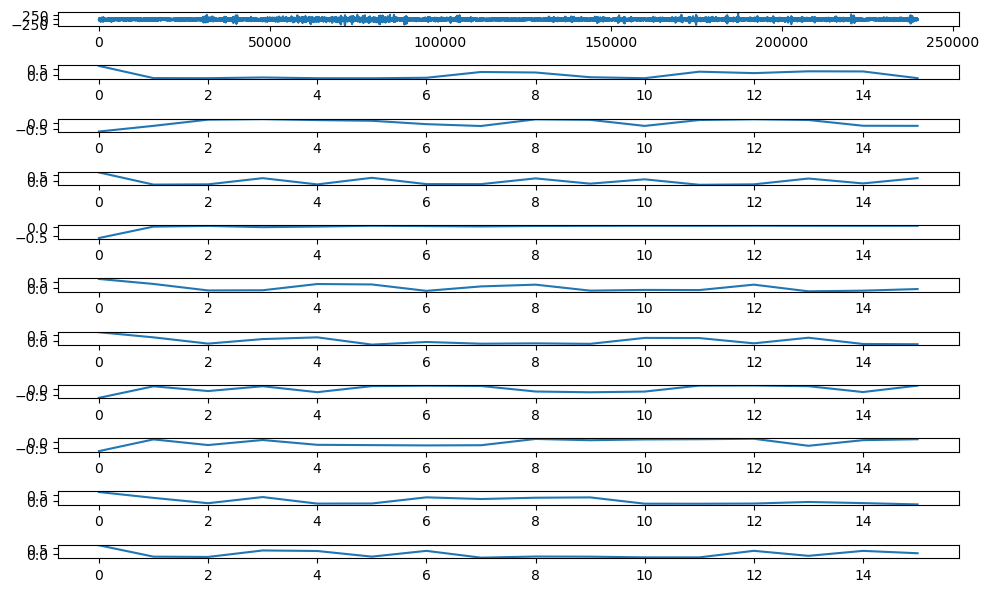

In [27]:
from sklearn.decomposition import FastICA

number_of_components = 16

# Perform ICA on the EEG data
ica = FastICA(n_components=number_of_components)  # Set the desired number of components
ica_components = ica.fit_transform(signals)  # Transpose data for ICA

# Plot original EEG data and ICA components for visualization
num_plots = min(number_of_components, 10)  # Adjust the number of plots based on components
plt.figure(figsize=(10, 6))

# Plot original EEG data (plotting the first channel as an example)
plt.subplot(num_plots + 1, 1, 1)
plt.plot(signals[0, :])  # Plotting the first channel as an example

# Plot ICA components
for i in range(num_plots):
    plt.subplot(num_plots + 1, 1, i + 2)
    plt.plot(ica_components[:, i])

plt.tight_layout()
plt.show()

## Define custom features

In [15]:
from tsfresh.feature_extraction.feature_calculators import set_property, abs_energy
from tsfresh.feature_extraction import feature_calculators
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction.settings import ComprehensiveFCParameters, PickableSettings
import numpy as np
import pandas as pd

Fs = 399.6097561  # Hz

# @set_property("fctype", "simple")
def power_delta(x):
    freq_min = 1 # 0 for testing  # Hz
    freq_max = 4 # 2*Fs/x.shape[0] for testing  # Hz
    freq = np.fft.fftfreq(x.shape[0], d=1/Fs)
    # print(freq)
    power_spectrum = np.abs(np.fft.fft(x))**2
    # print(power_spectrum)
    # print(power_spectrum[(freq >= freq_min) & (freq < freq_max)])
    result = np.mean(power_spectrum[(freq >= freq_min) & (freq < freq_max)])
    # print(result)
    return result


# @set_property("fctype", "simple")
def power_theta(x):
    freq_min = 4  # Hz
    freq_max = 8  # Hz
    freq = np.fft.fftfreq(x.shape[0], d=1/Fs)
    power_spectrum = np.abs(np.fft.fft(x))**2
    result = np.mean(power_spectrum[(freq >= freq_min) & (freq < freq_max)])
    return result
    

# @set_property("fctype", "simple")
def power_alpha(x):
    freq_min = 8   # Hz
    freq_max = 14  # Hz
    freq = np.fft.fftfreq(x.shape[0], d=1/Fs)
    power_spectrum = np.abs(np.fft.fft(x))**2
    result = np.mean(power_spectrum[(freq >= freq_min) & (freq < freq_max)])
    return result


# @set_property("fctype", "simple")
def power_beta(x):
    freq_min = 14
    freq_max = 30
    freq = np.fft.fftfreq(x.shape[0], d=1/Fs)
    power_spectrum = np.abs(np.fft.fft(x))**2
    result = np.mean(power_spectrum[(freq >= freq_min) & (freq < freq_max)])
    return result


# @set_property("fctype", "simple")
def power_gamma(x):
    freq_min = 30
    freq = np.fft.fftfreq(x.shape[0], d=1/Fs)
    power_spectrum = np.abs(np.fft.fft(x))**2
    result = np.mean(power_spectrum[(freq >= freq_min)])
    return result
    

# @set_property("fctype", "simple")
def root_abs_energy(x):
    return np.sqrt(abs_energy(x))


def get_powers(x):
    freq = np.fft.fftfreq(x.shape[0], d=1/Fs)
    power_spectrum = np.abs(np.fft.fft(x))**2
    results = {}
    results['power_delta'] = np.mean(power_spectrum[(freq >= 1) & (freq < 4)])
    results['power_theta'] = np.mean(power_spectrum[(freq >= 4) & (freq < 8)])
    results['power_alpha'] = np.mean(power_spectrum[(freq >= 8) & (freq < 14)])
    results['power_beta'] = np.mean(power_spectrum[(freq >= 14) & (freq < 30)])
    results['power_gamma'] = np.mean(power_spectrum[(freq >= 30)])
    return results


def get_custom_feat(x):
    results = get_powers(x)
    results['root_abs_energy'] = np.sqrt(abs_energy(x))
    return result


print(power_delta(signals[0,:]))
print(power_theta(signals[0,:]))
print(power_alpha(signals[0,:]))
print(power_beta(signals[0,:]))
print(power_gamma(signals[0,:]))

print(root_abs_energy(signals[0,:]))

fc_parameters = {
    "mean": None,
    "standard_deviation": None,
    "absolute_sum_of_changes": None,
    "minimum": None,
    "maximum": None,
    "skewness": None,
    "kurtosis": None,
    "root_mean_square": None
}

test_df = pd.DataFrame({'id': 0, 'signal': signals[0,:]})
print(signals[0,:])
print(test_df.head())

ts_results = extract_features(test_df, default_fc_parameters=fc_parameters, column_id='id', n_jobs=5)
cust_results = get_custom_feat(signals[0,:])
print(cust_results)
all_feat = pd.concat([ts_results, pd.DataFrame(cust_results, index=[0])], axis=1)
print(all_feat)

5028866659.471661
2124776568.4938595
2088439415.032735
669944046.3060027
30535969.948044293
66.6033
[  0  13  15 ... -25 -21 -12]
   id  signal
0   0       0
1   0      13
2   0      15
3   0      14
4   0      14


Feature Extraction:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/aidenmaloney-bertelli/anaconda3/envs/eeg/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/Users/aidenmaloney-bertelli/anaconda3/envs/eeg/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/Users/aidenmaloney-bertelli/anaconda3/envs/eeg/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
Feature Extraction: 100%|█████████████████████████| 1/1 [00:01<00:00,  1.52s/it]

{'power_delta': 5028866659.471661, 'power_theta': 2124776568.4938595, 'power_alpha': 2088439415.032735, 'power_beta': 669944046.3060027, 'power_gamma': 30535969.948044293, 'root_abs_energy': 66.6033}
   signal__mean  signal__standard_deviation  signal__absolute_sum_of_changes  \
0       0.36951                   34.519771                        1843266.0   

   signal__minimum  signal__maximum  signal__skewness  signal__kurtosis  \
0           -301.0            373.0          0.018197          3.903015   

   signal__root_mean_square   power_delta   power_theta   power_alpha  \
0                  33.34983  5.028867e+09  2.124777e+09  2.088439e+09   

     power_beta   power_gamma  root_abs_energy  
0  6.699440e+08  3.053597e+07        66.603302  


In [9]:
import pandas as pd
import numpy as np

upper_time = 1200  # s, (20 min)

def segment_signal(signal, window_size, overlap, Fs):
    window_id = 0
    window_start_ind = 0
    signal_length = signal.shape[0]
    t_axis = np.arange(0, signal_length*Fs, 1/Fs)
    result_df = pd.DataFrame(columns=["window_id", "time", "signal"])
    while window_start_ind < signal_length:
        window_end_ind = np.min([signal_length, window_start_ind+window_size])
        
        this_time = upper_time * np.ones((window_size,))
        this_signal = np.zeros((window_size,))
        this_time[:window_end_ind-window_start_ind] = t_axis[window_start_ind:window_end_ind]
        this_signal[:window_end_ind-window_start_ind] = signal[window_start_ind:window_end_ind]

        this_df = pd.DataFrame({"window_id": window_id, "time": this_time, "signal": this_signal})
        result_df = pd.concat([result_df, this_df])
        
        window_start_ind += window_size - overlap
        window_id += 1
    return result_df


result_df = segment_signal(signals[0, 0:3600], 800, 200, Fs)
print(result_df[result_df['window_id'] == 5])
ts_fresh_feat = extract_features(result_df, default_fc_parameters=fc_parameters, column_id='window_id', column_sort='time', n_jobs=5)
print(ts_fresh_feat)

    window_id         time  signal
0           5     7.507324   -21.0
1           5     7.509827   -32.0
2           5     7.512329   -35.0
3           5     7.514832   -16.0
4           5     7.517334   -14.0
..        ...          ...     ...
795         5  1200.000000     0.0
796         5  1200.000000     0.0
797         5  1200.000000     0.0
798         5  1200.000000     0.0
799         5  1200.000000     0.0

[800 rows x 3 columns]


/var/folders/hn/yyv5wsk50ydgqhd2jcrzvw3m0000gn/T/ipykernel_58517/945425503.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, this_df])
Feature Extraction:   0%|                                 | 0/6 [00:00<?, ?it/s]/Users/aidenmaloney-bertelli/anaconda3/envs/eeg/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/Users/aidenmaloney-bertelli/anaconda3/envs/eeg/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
 

   signal__mean  signal__standard_deviation  signal__absolute_sum_of_changes  \
0       3.73625                   33.959228                           4778.0   
1       1.98625                   39.265011                           6417.0   
2      -2.96500                   29.621129                           6285.0   
3      -6.30750                   18.566043                           5528.0   
4      -7.01500                   22.296631                           6489.0   
5      -6.62375                   23.391391                           5445.0   

   signal__minimum  signal__maximum  signal__skewness  signal__kurtosis  \
0           -134.0             94.0         -0.343216          1.047519   
1           -129.0            115.0          0.040540          0.104620   
2           -129.0            115.0         -0.027062          1.698867   
3            -61.0             49.0          0.060557         -0.168195   
4            -73.0             69.0         -0.025152          0

In [27]:
def extract_feat_per_window(window_df, sample_col='window_id'):
    ts_fresh_feat = extract_features(window_df, default_fc_parameters=fc_parameters, column_id='window_id', column_sort='time', n_jobs=5)
    cust_results = []
    for i in range(window_df[sample_col].max()+1):
        this_sig = window_df[window_df[sample_col] == i]
        this_sig = this_sig['signal'].to_numpy()
        cust_results.append(get_custom_feat(this_sig))
    all_feat = pd.concat([ts_fresh_feat, pd.DataFrame(cust_results)], axis=1)
    return all_feat

all_feat = extract_feat_per_window(result_df)
print(all_feat)

Feature Extraction:   0%|                                 | 0/6 [00:00<?, ?it/s]/Users/aidenmaloney-bertelli/anaconda3/envs/eeg/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/Users/aidenmaloney-bertelli/anaconda3/envs/eeg/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/Users/aidenmaloney-bertelli/anaconda3/envs/eeg/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/Users/aidenmaloney-bertelli/anaconda3/envs/eeg/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of 

   signal__mean  signal__standard_deviation  signal__absolute_sum_of_changes  \
0       3.73625                   33.959228                           4778.0   
1       1.98625                   39.265011                           6417.0   
2      -2.96500                   29.621129                           6285.0   
3      -6.30750                   18.566043                           5528.0   
4      -7.01500                   22.296631                           6489.0   
5      -6.62375                   23.391391                           5445.0   

   signal__minimum  signal__maximum  signal__skewness  signal__kurtosis  \
0           -134.0             94.0         -0.343216          1.047519   
1           -129.0            115.0          0.040540          0.104620   
2           -129.0            115.0         -0.027062          1.698867   
3            -61.0             49.0          0.060557         -0.168195   
4            -73.0             69.0         -0.025152          0

## Data splitting

In [47]:
import os

root_folder = "/Volumes/LACIE SHARE/seizure-prediction"
sub_folders = ["Dog_1/Dog_1", "Dog_2/Dog_2", "Dog_3/Dog_3", "Dog_4/Dog_4", "Dog_5/Dog_5"]
interictal_files = []
preictal_files = []
test_files = []
for fol in sub_folders:
    for file_name in os.listdir(os.path.join(root_folder, fol)):
        if "._" in file_name:
            continue
        if 'interictal' in file_name:
            interictal_files.append(os.path.join(fol, file_name))
        elif 'preictal' in file_name:
            preictal_files.append(os.path.join(fol, file_name))
        elif 'test' in file_name:
            test_files.append(os.path.join(fol, file_name))

# save results
with open('interictal.txt', 'w') as f:
    for file_name in interictal_files:
        f.write(file_name + "\n")
with open('preictal.txt', 'w') as f:
    for file_name in preictal_files:
        f.write(file_name + "\n")
with open('nolabel.txt', 'w') as f:
    for file_name in test_files:
        f.write(file_name + "\n")

In [48]:
from sklearn.model_selection import train_test_split

interictal_files = [file_name.strip() for file_name in open('interictal.txt').readlines()]
preictal_files = [file_name.strip() for file_name in open('preictal.txt').readlines()]
all_files = interictal_files + preictal_files
classes = np.ones((len(all_files),))
classes[:len(interictal_files)] = 0

train_files, test_files = train_test_split(all_files, test_size=0.3, random_state=23, stratify=classes)

# save results
with open('train.txt', 'w') as f:
    for file_name in train_files:
        f.write(file_name + "\n")
with open('test.txt', 'w') as f:
    for file_name in test_files:
        f.write(file_name + "\n")      